# Modélisation Emissions de gaz à effet de serre

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

# Sklearn processing
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.compose import *

# Sklearn regression algorithms
from sklearn.linear_model import *

# Sklearn regression model evaluation functions
from sklearn.metrics import *

In [2]:
data = pd.read_csv("building-energy-cleaned.csv")

In [3]:
import os.path, time
print("Dernière modification: %s" % time.ctime(os.path.getmtime("building-energy-cleaned.csv")))

Dernière modification: Tue Aug  9 22:00:00 2022


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1548 non-null   int64  
 1   BuildingType            1548 non-null   object 
 2   PrimaryPropertyType     1548 non-null   object 
 3   Neighborhood            1548 non-null   object 
 4   NumberofBuildings       1548 non-null   float64
 5   NumberofFloors          1548 non-null   int64  
 6   PropertyGFAParking      1548 non-null   int64  
 7   PropertyGFABuilding(s)  1548 non-null   int64  
 8   LargestPropertyUseType  1548 non-null   object 
 9   ENERGYSTARScore         997 non-null    float64
 10  SiteEnergyUse(kBtu)     1548 non-null   float64
 11  TotalGHGEmissions       1548 non-null   float64
 12  BuildingAge             1548 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 157.3+ KB


In [5]:
data.describe()

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFAParking  \
count    1548.000000        1548.000000     1548.000000         1548.000000   
mean    16497.944444           1.212532        4.286822        13842.337209   
std     13827.877766           3.031517        6.774923        43721.822291   
min         1.000000           1.000000        1.000000            0.000000   
25%       602.750000           1.000000        1.000000            0.000000   
50%     21180.500000           1.000000        2.000000            0.000000   
75%     24609.000000           1.000000        4.000000            0.000000   
max     50226.000000         111.000000       99.000000       512608.000000   

       PropertyGFABuilding(s)  ENERGYSTARScore  SiteEnergyUse(kBtu)  \
count            1.548000e+03       997.000000         1.548000e+03   
mean             1.074898e+05        63.635908         8.860058e+06   
std              2.926272e+05        28.825309         3.130568e+07   
min              3.636000e+03         1.000000         5.713320e+04   
25%              2.793675e+04        44.000000         1.251083e+06   
50%              4.608400e+04        71.000000         2.732167e+06   
75%              9.556825e+04        88.000000         7.294487e+06   
max              9.320156e+06       100.000000         8.739237e+08   

       TotalGHGEmissions  BuildingAge  
count        1548.000000  1548.000000  
mean          193.609426    54.355943  
std           779.105149    32.886918  
min             0.001000     1.000000  
25%            20.655000    27.000000  
50%            49.845000    50.500000  
75%           147.227500    86.000000  
max         16870.980000   116.000000

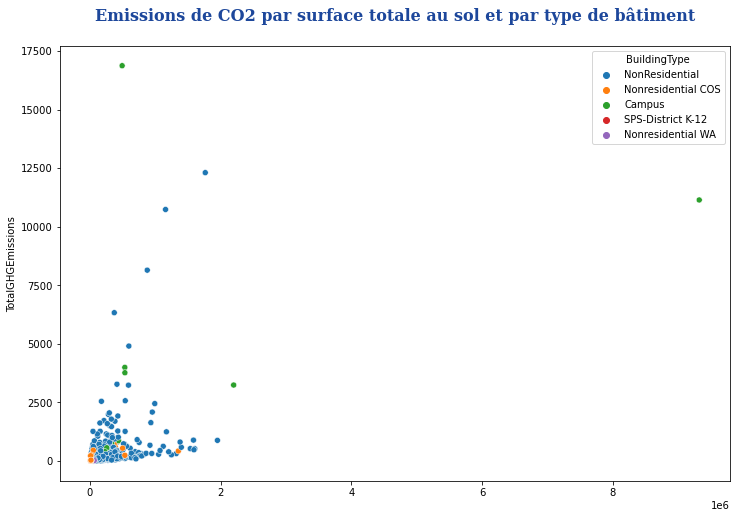

In [6]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x=data['PropertyGFAParking']+data['PropertyGFABuilding(s)'], y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Emissions de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

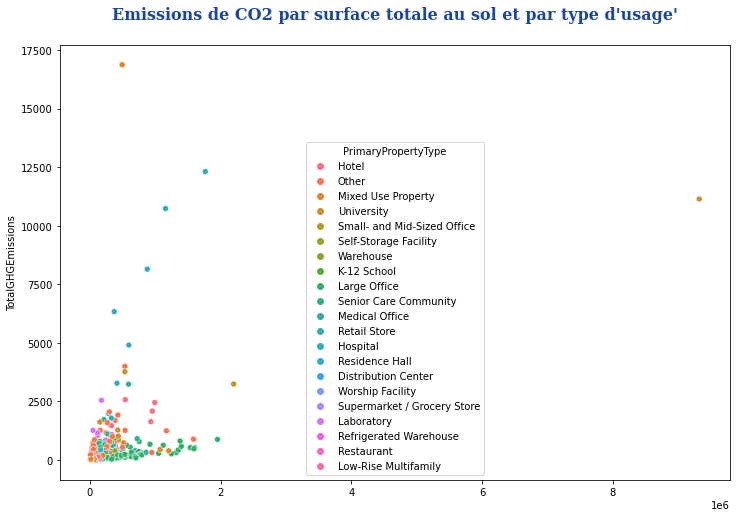

In [7]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x=data['PropertyGFAParking']+data['PropertyGFABuilding(s)'], y='TotalGHGEmissions', hue='PrimaryPropertyType')
plt.title(f"Emissions de CO2 par surface totale au sol et par type d'usage'\n", 
          fontdict=font_title, fontsize=16)
plt.show()

In [8]:
data[data['TotalGHGEmissions']>10000]

OSEBuildingID    BuildingType PrimaryPropertyType      Neighborhood  \
30               43          Campus  Mixed Use Property  GREATER DUWAMISH   
133             276  NonResidential            Hospital              EAST   
556             828  NonResidential            Hospital              EAST   
1510          49967          Campus          University         NORTHEAST   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
30                  1.0               3                   0   
133                 9.0               8                   0   
556                 7.0              14                   0   
1510              111.0               1                   0   

      PropertyGFABuilding(s)                 LargestPropertyUseType  \
30                    494835                                 Office   
133                  1158691  Hospital (General Medical & Surgical)   
556                  1765970  Hospital (General Medical & Surgical)   
1510                 9320156                     College/University   

      ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  BuildingAge  
30                8.0          448385312.0           16870.98           24  
133              29.0          293090784.0           10734.57           16  
556              54.0          291614432.0           12307.16           22  
1510              NaN          873923712.0           11140.56          116

In [9]:
data = data[data['TotalGHGEmissions']<10000]

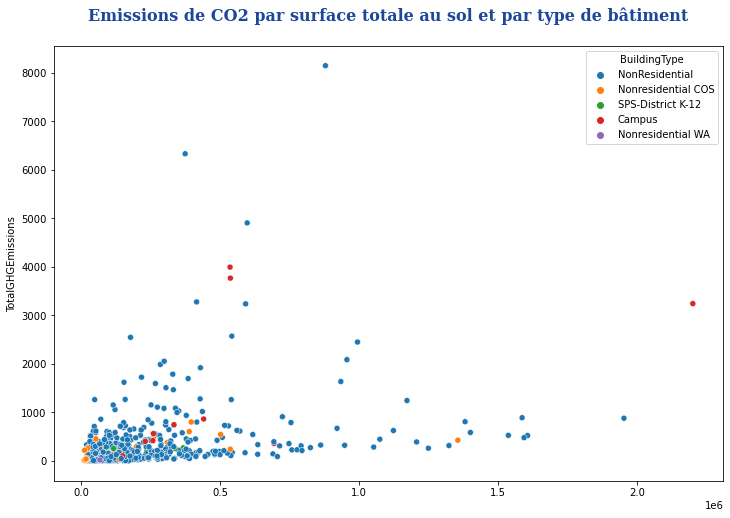

In [10]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x=data['PropertyGFAParking']+data['PropertyGFABuilding(s)'], y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Emissions de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

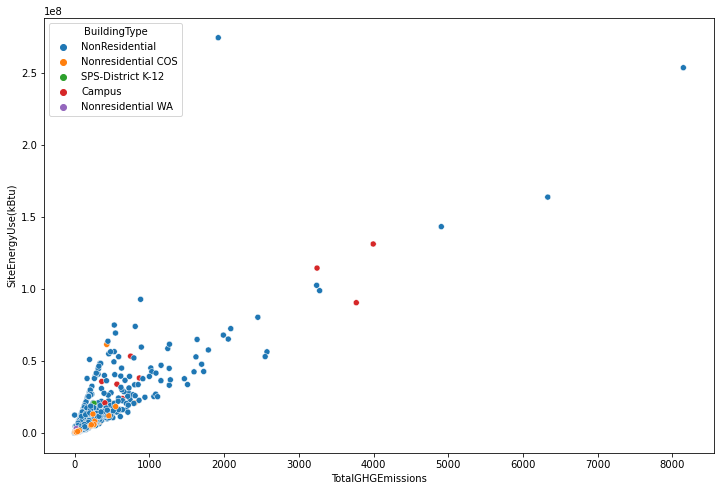

In [11]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x = 'TotalGHGEmissions', y = 'SiteEnergyUse(kBtu)', hue='BuildingType')
plt.show()

In [12]:
identification_features = ['OSEBuildingID']
data_identification = data[identification_features]
data.drop(identification_features, axis=1, inplace = True)

1.1. Encodage et standardisation

Nous allons séparer les données numériques et les données catégorielles de notre dataset :

In [13]:
numerical_features = data.select_dtypes(include=['int64','float64'])
categorical_features = data.select_dtypes(exclude=['int64','float64'])

In [14]:
categorical_features.nunique()

BuildingType               5
PrimaryPropertyType       21
Neighborhood              13
LargestPropertyUseType    55
dtype: int64

In [15]:
list(numerical_features.columns)

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge']

ENERGYSTARScore est insuffisamment complété. Nous allons l'écarter du dataset mais nous la conservons pour vérifier ensuite si cette variable a un impact sur la qualité de prédiction.

In [16]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore'], axis=1)

In [17]:
data_filter = pd.concat([categorical_features, numerical_features], axis=1)

In [18]:
data_filter.head()

BuildingType PrimaryPropertyType Neighborhood LargestPropertyUseType  \
0  NonResidential               Hotel     DOWNTOWN                  Hotel   
1  NonResidential               Hotel     DOWNTOWN                  Hotel   
2  NonResidential               Hotel     DOWNTOWN                  Hotel   
3  NonResidential               Hotel     DOWNTOWN                  Hotel   
4  NonResidential               Hotel     DOWNTOWN                  Hotel   

   NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                1.0              12                   0   
1                1.0              11               15064   
2                1.0              41              196718   
3                1.0              10                   0   
4                1.0              18               62000   

   PropertyGFABuilding(s)  SiteEnergyUse(kBtu)  TotalGHGEmissions  BuildingAge  
0                   88434            7226362.5             249.98           89  
1                   88502            8387933.0             295.86           20  
2                  759392           72587024.0            2089.28           47  
3                   61320            6794584.0             286.43           90  
4                  113580           14172606.0             505.01           36

Préparation du Preprocessor

In [19]:
cat_features = ['BuildingType','PrimaryPropertyType','Neighborhood', 'LargestPropertyUseType']
cat_transformer = OneHotEncoder(handle_unknown='ignore')

numeric_features = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
                     'PropertyGFABuilding(s)', 'BuildingAge']
numeric_transformer = RobustScaler(unit_variance=True)

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_features),
    ('numeric', numeric_transformer, numeric_features)
])

In [20]:
import warnings
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
        
    ------
    Code from :
        https://johaupt.github.io/
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        feature_names.extend(get_names(trans))
    
    return feature_names

1.2. Préparation des jeux d'entrainement et de test

In [21]:
from sklearn.model_selection import train_test_split

X = data_filter.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
Y = data_filter[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1235 lignes,
Test: 309 lignes.



Concernant nos variables à prédire, nous allons regarder l'impact du passage à l'échelle logarithmique sur les distributions :

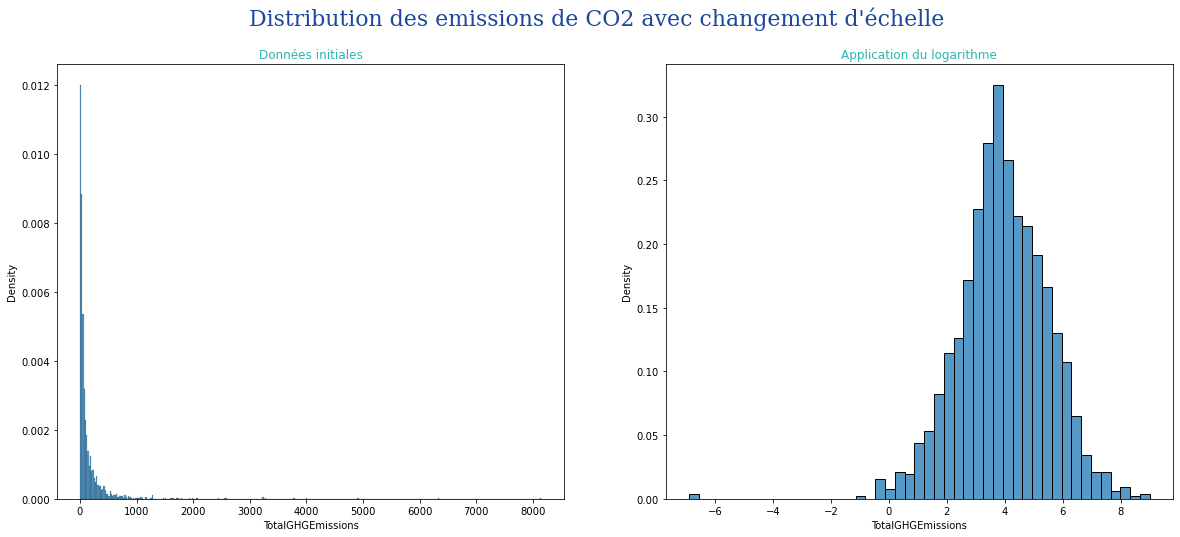

In [22]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=Y, x='TotalGHGEmissions', stat="density", ax=axes[0])
axes[0].set_title("Données initiales", color='#2cb7b0')
sns.histplot(data=Y_log, x='TotalGHGEmissions', stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme", color='#2cb7b0')
plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontdict=font_title, fontsize=22)
plt.show()

En passant les données à l'échelle logarithmique, nous obtenons une distribution normale des données à prédire. Nous allons donc appliquer cette transformation dans notre pipeline grâce à la fonction TransformedTargetRegressor de la librairie Sklearn.

La fonction inverse (exp) sera donc passée dans les prédictions.

In [23]:
from sklearn.dummy import DummyRegressor
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train, Y_train['TotalGHGEmissions'])
dummy_pred = dummy_reg.predict(X_test)

In [24]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "R²"], "Résultats":[mae, mse, rmse, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [25]:
dummy_metrics = metrics_model(Y_test['TotalGHGEmissions'], dummy_pred).rename(columns={'Résultats':'Baseline'})
dummy_metrics

Métrique      Baseline
0      MAE    155.068600
1      MSE  53193.008212
2     RMSE    230.636095
3       R²     -0.015558

Ce sera donc nos références de base

In [26]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearRegression(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [27]:
#Retour des meilleurs scores NMAE et R2
#Stockage du dataframe de resultats du modèle
def model_scores(pip,step):
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    best_nmae = pip.named_steps[step].best_score_
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    print("Meilleur score MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_nmae,3), round(best_r2,3), best_params, training_time))
    return df_results

In [28]:
GHG_mlr_model = mlr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_mlr_results = model_scores(GHG_mlr_model, 'grid_search_mlr')

Meilleur score MAE : -1090.674
Meilleur Score R2 : -2569.306
Meilleurs paramètres : {'regressor__fit_intercept': False, 'regressor__normalize': True}
Temps moyen d'entrainement : 34.63s


3. Modèle linéaires : ElasticNet et SVR¶
3.1. Modèle ElasticNet

In [29]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=ElasticNet(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [30]:
GHG_eNet_model = eNet_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_eNet_results = model_scores(GHG_eNet_model, 'grid_search_enet')

Meilleur score MAE : -144.142
Meilleur Score R2 : -0.299
Meilleurs paramètres : {'regressor__alpha': 1.0, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 10}
Temps moyen d'entrainement : 66.71s


3.2. Modèle Support Vector Regression (SVR)

In [31]:
from sklearn.svm import LinearSVR

param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=LinearSVR(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_svr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [32]:
GHG_svr_model = svr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_svr_results = model_scores(GHG_svr_model, 'grid_search_svr')

Meilleur score MAE : -1518.564
Meilleur Score R2 : -4620.964
Meilleurs paramètres : {'regressor__C': 0.1, 'regressor__epsilon': 0.5, 'regressor__loss': 'epsilon_insensitive', 'regressor__max_iter': 10}
Temps moyen d'entrainement : 27.34s


C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-3.57081909e+065 -1.05840428e+072 -7.51026809e+095 -8.27666257e+223
 -1.12519750e+064 -1.04599028e+163 -6.94881891e+208 -3.47615537e+106
 -2.90631370e+048 -1.27892687e+206 -1.46996287e+065 -1.94006330e+031
 -2.60154101e+155 -2.26108630e+204 -4.10649597e+088 -1.95827135e+114
 -2.67009468e+047 -2.60692037e+150             -inf -2.71182062e+094
 -6.88982177e+032 -7.15386792e+036 -3.34420123e+043 -2.51540136e+037
 -3.61479586e+081 -1.15065763e+221 -2.52280809e+156 -3.39028799e+064
 -1.93119006e+039 -9.75781833e+076 -1.34459013e+071 -1.96267340e+052
 -1.98370131e+052 -2.86076395e+097 -3.84133785e+048 -2.12807503e+086
 -2.64189003e+025 -4.33926481e+033 -4.08720526e+018 -4.33711138e+112
 -3.41501763e+021 -2.26762300e+041 -5.48909204e+052 -9.34387459e+026
 -2.29364985e+255 -8.65897312e+038 -4.99928712e+078 -8.71821531e+029
 -5.62421020e+020 -9.85058672

#  4. Modèle non-linéaires : XGBoost et RandomForestRegressor
## 4.1. Modèle RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [5, 15, 25, 50],
             'regressor__min_samples_split': [2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [34]:
GHG_rfr_model = rfr_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results = model_scores(GHG_rfr_model, 'grid_search_rfr')

Meilleur score MAE : -104.883
Meilleur Score R2 : 0.397
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 269.24s


## 4.2. Modèle XGBoost (eXtreme Gradient Boosting)

In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_xgb = {'regressor__learning_rate' : [0.001, 0.01, 0.1, 0.2, 0,3],
             'regressor__gamma': [0, 0.25, 0.5, 1.0],
             'regressor__max_depth': [6, 10, 15, 20],
             'regressor__min_child_weight' : [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
             'regressor__n_estimators': [25, 50, 100, 500, 1000]}

xgb_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_xgb', RandomizedSearchCV(
                            TransformedTargetRegressor(
                                regressor=xgb.XGBRegressor(tree_method='hist'), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_distributions=param_xgb,
                            n_iter=20,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [36]:
GHG_xgb_model = xgb_grid_cv.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_xgb_results = model_scores(GHG_xgb_model, 'grid_search_xgb')

Meilleur score MAE : -99.772
Meilleur Score R2 : 0.574
Meilleurs paramètres : {'regressor__n_estimators': 50, 'regressor__min_child_weight': 0.5, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.2, 'regressor__gamma': 0.25}
Temps moyen d'entrainement : 549.66s


C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.08925452 -0.17911464 -0.17911464  0.55028969  0.25293105 -0.08878441
 -0.09185879 -0.17911464  0.51654772 -0.17911464  0.50570828 -0.18312837
         nan -0.17864437  0.57420847 -0.15638292  0.4595016  -0.17911464
 -0.17911464  0.51348333]
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.05680585 -0.12905101 -0.12905101  0.87692783  0.31637666 -0.05619707
 -0.06028193 -0.12905101  0.84078158 -0.12905101  0.7618731  -0.13165531
         nan -0.12873058  0.99754986 -0.11279302  0.84958538 -0.12905101
 -0.12905101  0.99992051]
  warnings.warn(
C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-149.49450109 -165.12774605 -165.12774605  -9

# 5. Sélection du meilleur modèle¶
## 5.1 Modèle de prédiction des consommations d'énergie

In [37]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error']

GHG_compare_metrics = pd.concat([pd.DataFrame(GHG_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(GHG_xgb_results[metrics].mean(), columns=['XGBoost']),
           pd.DataFrame(GHG_svr_results[metrics].mean(), columns=['LinearSVR']),
           pd.DataFrame(GHG_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(GHG_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
GHG_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest','XGBoost',
                                            'LinearSVR','ElasticNet',
                                            'LinearRegression'])
for m in metrics:
    GHG_final_metrics_compare[m] = GHG_compare_metrics.loc[m]
GHG_final_metrics_compare

mean_fit_time  mean_score_time  \
RandomForest           0.218009         0.013733   
XGBoost                0.445069         0.007325   
LinearSVR              0.022136         0.000902   
ElasticNet             0.054014         0.000852   
LinearRegression       0.028041         0.000798   

                  mean_test_neg_mean_absolute_error  \
RandomForest                          -1.197351e+02   
XGBoost                               -1.400794e+02   
LinearSVR                            -1.473573e+243   
ElasticNet                            -7.809192e+02   
LinearRegression                      -1.108458e+03   

                  mean_train_neg_mean_absolute_error  
RandomForest                           -1.062164e+02  
XGBoost                                -1.176269e+02  
LinearSVR                             -4.257882e+199  
ElasticNet                             -2.046842e+02  
LinearRegression                       -1.789728e+02

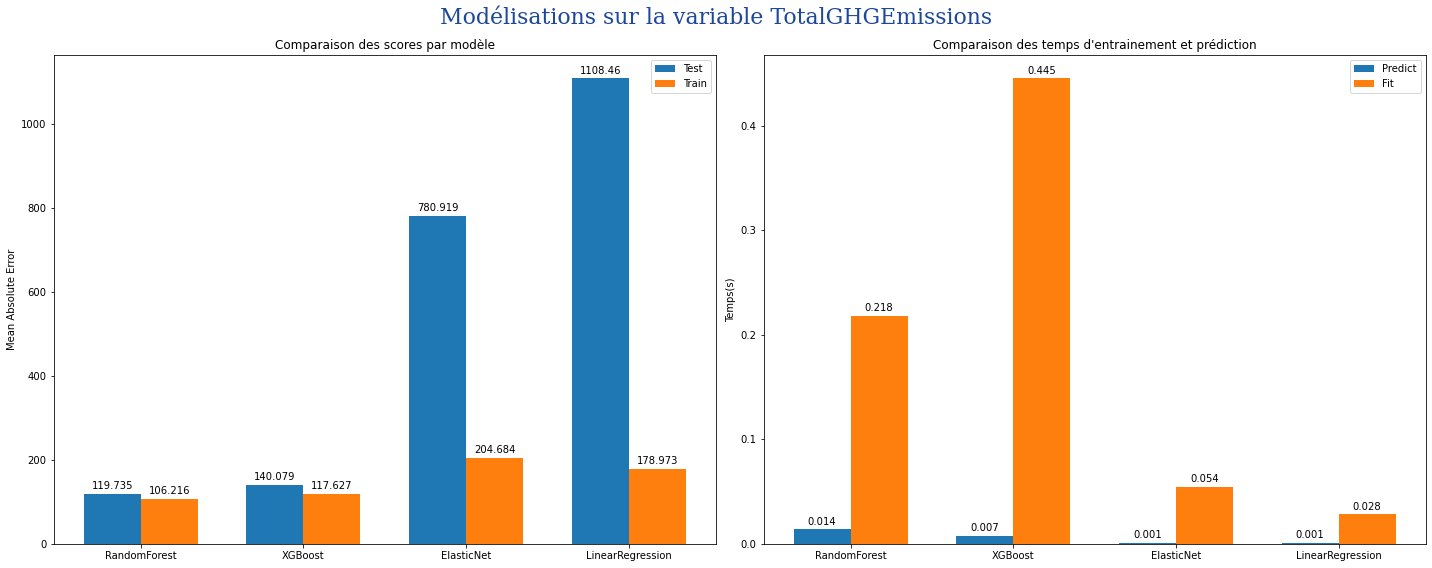

In [38]:
GHG_final_metrics_compare = GHG_final_metrics_compare[GHG_final_metrics_compare.index != 'LinearSVR']
x = np.arange(len(GHG_final_metrics_compare.index))
width = 0.35

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*GHG_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*GHG_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(GHG_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, GHG_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, GHG_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(GHG_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Modélisations sur la variable TotalGHGEmissions", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()

Le modèle offrant le meilleur compromis est le random forest.

In [39]:
#Fonction d'affichage des scores de GridSearch pour chacun des paramètres
def plot_search_results(grid, title): 
       
    ## Résultats de la GridSearch
    results = grid.cv_results_
    means_test = results['mean_test_neg_mean_absolute_error']
    stds_test = results['std_test_neg_mean_absolute_error']
    means_train = results['mean_train_neg_mean_absolute_error']
    stds_train = results['std_train_neg_mean_absolute_error']

    ## Index de valeurs par hyper-paramètre
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    
    ## Plot des résultats
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Scores par paramètres pour la variable {}'.format(title), 
                 fontdict=font_title, fontsize=22)
    fig.text(0.04, 0.5, 'NEG MEAN ABSOLUTE ERROR SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test', color="#2cb7b0")
        ax[i].errorbar(x, y_2, e_2, linestyle='--', marker='o', label='train', color="#337da4")
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()
    
    print("\nRappel des meilleurs paramètres :\n{}".format(grid.best_params_))

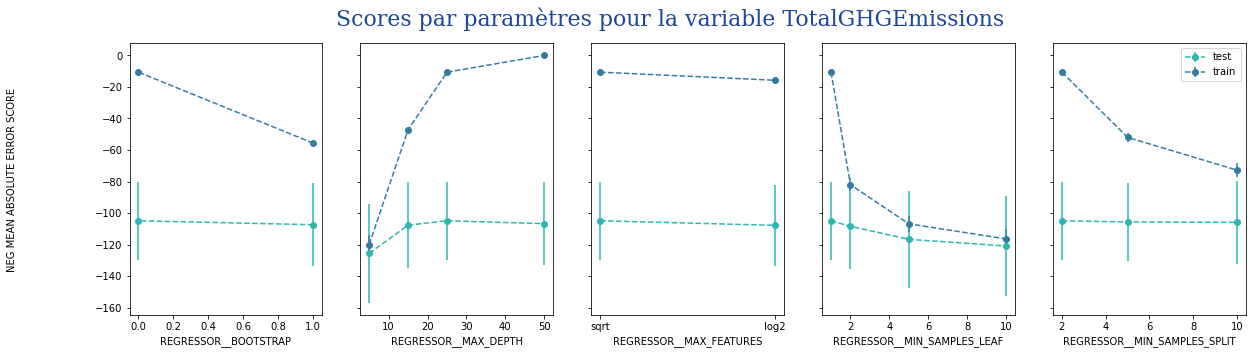


Rappel des meilleurs paramètres :
{'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}


In [40]:
plot_search_results(GHG_rfr_model.named_steps['grid_search_rfr'], title="TotalGHGEmissions")

Regardons à présent l'importance des variables dans notre modèle de forêts aléatoires

C:\Users\laure\AppData\Local\Temp/ipykernel_1365300/272616078.py:35: UserWarning: Transformer numeric (type RobustScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


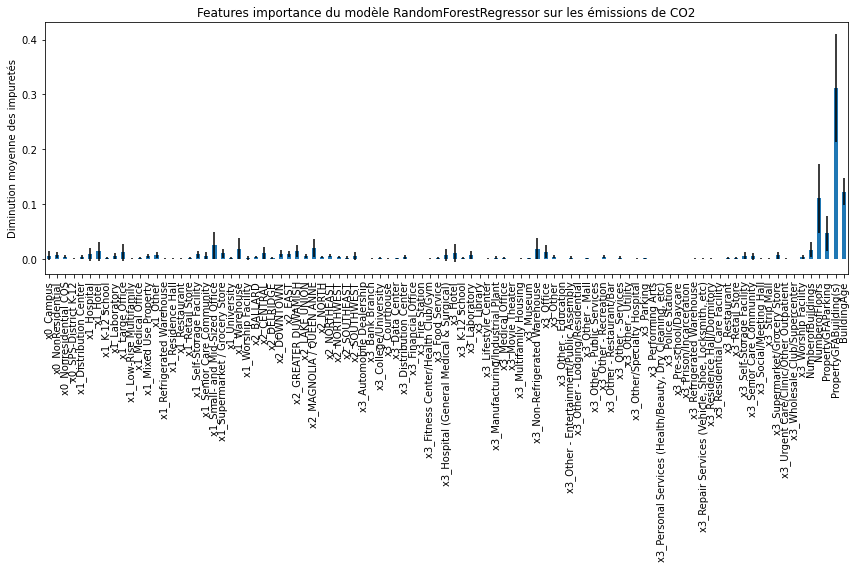

In [41]:
feature_importance = GHG_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_.feature_importances_ 
features_names = get_feature_names(GHG_rfr_model.named_steps['preprocessor'])
std = np.std([
    tree.feature_importances_ for tree in GHG_rfr_model.named_steps['grid_search_rfr'].best_estimator_.regressor_], axis=0)
df_feature_importance = pd.Series(feature_importance, index=features_names)

fig, ax = plt.subplots(figsize=(12,8))
df_feature_importance.plot.bar(yerr=std, ax=ax)
ax.set_title("Features importance du modèle RandomForestRegressor sur les émissions de CO2")
ax.set_ylabel("Diminution moyenne des impuretés")
fig.tight_layout()

6. Test des modèles sélectionnés

Nous allons à présent tester les modèles sélectionnés sur nos données test et vérifier leurs performances.

In [42]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [43]:
def plot_pred_true(y_true, y_pred, color=None, title=None):
    X_plot = [y_true.min(), y_true.max()]
    fig = plt.figure(figsize=(12,8))
    plt.scatter(y_true, y_pred, color=color, alpha=.6)
    plt.plot(X_plot, X_plot, color='r')
    plt.xlabel("Valeurs réélles")
    plt.ylabel("Valeurs prédites")
    plt.title("Valeurs prédites VS valeurs réélles | Variable {}".format(title), 
              fontdict=font_title, fontsize=18)
    plt.show()

In [44]:
start_time = time.time()

GHG_pred = GHG_rfr_model.predict(X_test)

print("Temps d'execution de l'algorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'algorithme : 0.026 s.


In [45]:
#Calcul des métriques pour la consommation d'énergie
GHGmetrics = metrics_model(Y_test['TotalGHGEmissions'],GHG_pred)
GHGmetrics

Métrique  Résultats
0      MAE  88.619471
1       R²   0.345278

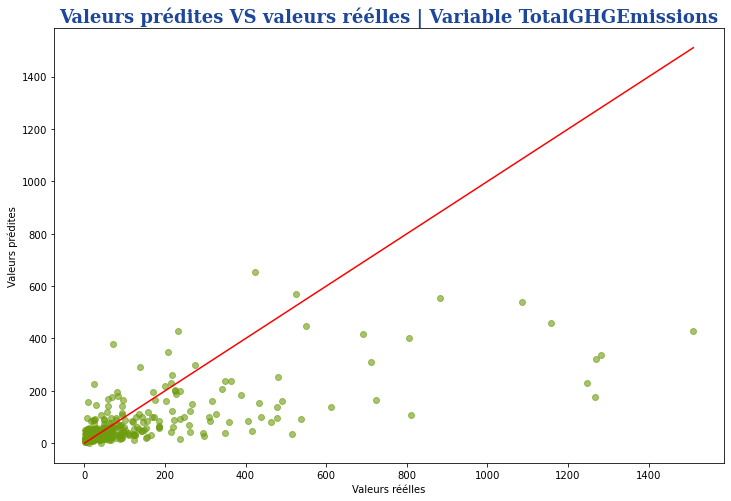

In [46]:
#Affichage des valeurs prédites vs valeurs réélles pour émissions de CO2
plot_pred_true(Y_test['TotalGHGEmissions'],GHG_pred, color="#6D9C0E", title="TotalGHGEmissions")

In [47]:
final_GHG_test = pd.concat([X_test,Y_test],axis=1)
final_GHG_test['GHG_pred'] = GHG_pred
compare_final_GHG_test = final_GHG_test = final_GHG_test.groupby(by='BuildingType').mean()

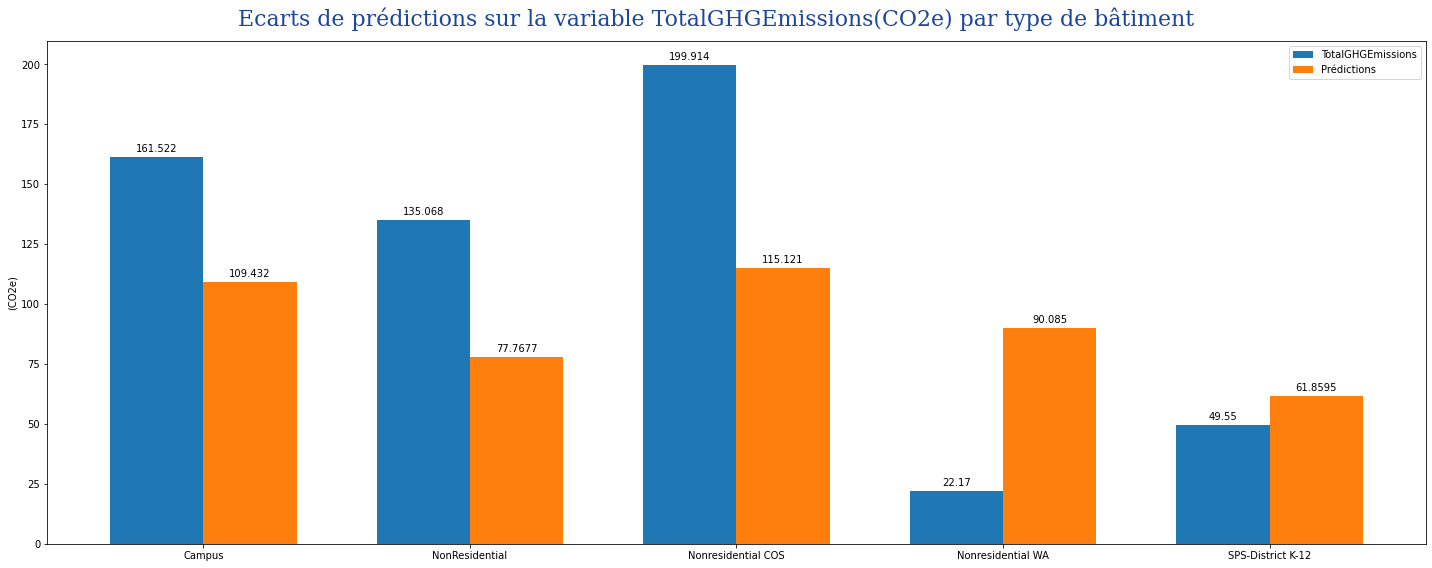

In [48]:
x = np.arange(len(compare_final_GHG_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8), sharey=False, sharex=False)

scores1 = ax.bar(x - width/2, compare_final_GHG_test['TotalGHGEmissions'], width, label='TotalGHGEmissions')
scores2 = ax.bar(x + width/2, compare_final_GHG_test['GHG_pred'], width, label='Prédictions')
ax.set_ylabel('(CO2e)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_GHG_test.index)
ax.legend()
ax.bar_label(scores1, padding=3)
ax.bar_label(scores2, padding=3)

plt.suptitle("Ecarts de prédictions sur la variable TotalGHGEmissions(CO2e) par type de bâtiment", fontdict=font_title, fontsize=22)
fig.tight_layout()

plt.show()


Les écarts de prédiction ne se concentrent pas sur un type de bâtiment comme la feature SiteEnergyUse

Sous-évaluation pour 3 catégories et sur-évaluation pour une autre, la 5e est relativement proche

# 7. Influence du score ENERGY STAR

In [49]:
#Ajout de la variable à nos variables X
X['energystar_score'] = energystar_score
#Ajout de la variable dans les variables numérique du preprocessor
numeric_features.append('energystar_score')

In [50]:
#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['energystar_score'].isnull()==False]
Y = Y[Y.index.isin(list(X.index))]

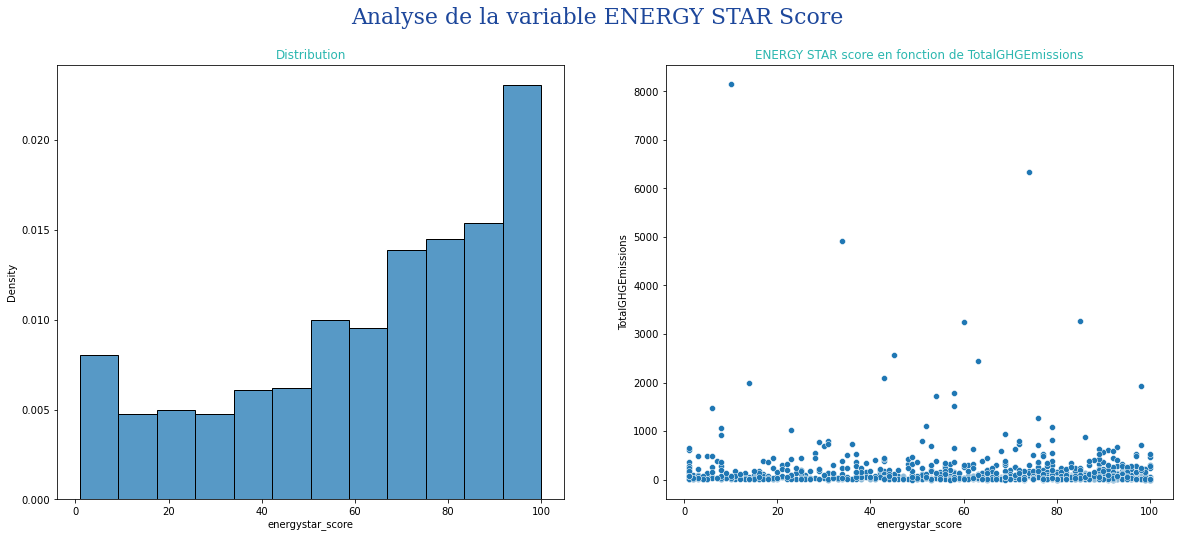

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='energystar_score', stat="density", ax=axes[0])
axes[0].set_title("Distribution", color='#2cb7b0')
sns.scatterplot(data=pd.concat([X,Y], axis=1), y='TotalGHGEmissions', x='energystar_score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de TotalGHGEmissions", color='#2cb7b0')
plt.suptitle("Analyse de la variable ENERGY STAR Score", fontdict=font_title, fontsize=22)
plt.show()

On remarque ici que le score ENERGY STAR ne semble pas avoir de corrélation importante avec la consommation d'énergie. La distribution ne suit pas de loi normale et la majorité des batiments a un score supérieur à 50 (de bonne qualité voir de très bonne qualité).

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 795 lignes,
Test: 199 lignes.



On utilise ici le meilleur modèle calculé sur la variable SiteEnergyUse(kBtu) en incluant l'ENERGY STAR Score :

In [53]:
rfr_grid_cv_eStar = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr_eStar', GridSearchCV(
                            TransformedTargetRegressor(
                                regressor=RandomForestRegressor(), 
                                func=np.log, 
                                inverse_func=np.exp),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

GHG_rfr_model_eStar = rfr_grid_cv_eStar.fit(X_train, Y_train['TotalGHGEmissions'])
GHG_rfr_results_eStar = model_scores(GHG_rfr_model_eStar, 'grid_search_rfr_eStar')

Meilleur score MAE : -82.569
Meilleur Score R2 : 0.54
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 134.76s


In [54]:
GHG_pred_star = GHG_rfr_model_eStar.predict(X_test)
#Calcul des métriques pour les émissions de gaz à effet de serre
GHGmetricsES = metrics_model(Y_test['TotalGHGEmissions'],GHG_pred_star)
GHGmetrics = GHGmetrics.rename(columns={"Résultats" : "Sans ENERGY STAR"})
GHGmetrics['Avec ENERGY STAR'] = GHGmetricsES['Résultats']
GHGmetrics

Métrique  Sans ENERGY STAR  Avec ENERGY STAR
0      MAE         88.619471        111.550684
1       R²          0.345278          0.298050

Le modèle est encore moins performant avec l'ajout de l'EnergyStar Score

## Feature importance SHAP

In [55]:
df = pd.read_csv("building-energy-cleaned.csv")

In [56]:
df = df.drop(['SiteEnergyUse(kBtu)', 'ENERGYSTARScore'], axis=1)

In [57]:
df = df[df['TotalGHGEmissions']<10000]

In [58]:
identification_features = ['OSEBuildingID']
df_identification = df[identification_features]
df.drop(identification_features, axis=1, inplace = True)

In [59]:
df

BuildingType PrimaryPropertyType           Neighborhood  \
0         NonResidential               Hotel               DOWNTOWN   
1         NonResidential               Hotel               DOWNTOWN   
2         NonResidential               Hotel               DOWNTOWN   
3         NonResidential               Hotel               DOWNTOWN   
4         NonResidential               Hotel               DOWNTOWN   
...                  ...                 ...                    ...   
1543  Nonresidential COS               Other               DELRIDGE   
1544  Nonresidential COS               Other               DOWNTOWN   
1545  Nonresidential COS               Other  MAGNOLIA / QUEEN ANNE   
1546  Nonresidential COS  Mixed Use Property       GREATER DUWAMISH   
1547  Nonresidential COS  Mixed Use Property       GREATER DUWAMISH   

      NumberofBuildings  NumberofFloors  PropertyGFAParking  \
0                   1.0              12                   0   
1                   1.0              11               15064   
2                   1.0              41              196718   
3                   1.0              10                   0   
4                   1.0              18               62000   
...                 ...             ...                 ...   
1543                1.0               1                   0   
1544                1.0               1                   0   
1545                1.0               1                   0   
1546                1.0               1                   0   
1547                1.0               1                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  TotalGHGEmissions  \
0                      88434                  Hotel             249.98   
1                      88502                  Hotel             295.86   
2                     759392                  Hotel            2089.28   
3                      61320                  Hotel             286.43   
4                     113580                  Hotel             505.01   
...                      ...                    ...                ...   
1543                   18261     Other - Recreation              20.33   
1544                   16000     Other - Recreation              32.17   
1545                   13157     Other - Recreation             223.54   
1546                   14101     Other - Recreation              22.11   
1547                   18258     Other - Recreation              41.27   

      BuildingAge  
0              89  
1              20  
2              47  
3              90  
4              36  
...           ...  
1543           34  
1544           12  
1545           42  
1546           27  
1547           78  

[1544 rows x 10 columns]

In [60]:
ligne_na = df.loc[df.isna().any(axis=1)]

In [61]:
ligne_na

Empty DataFrame
Columns: [BuildingType, PrimaryPropertyType, Neighborhood, NumberofBuildings, NumberofFloors, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, TotalGHGEmissions, BuildingAge]
Index: []

In [62]:
df_cat = df[['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType']]

In [63]:
# OHE

from sklearn.preprocessing import OneHotEncoder
# Drop one level for each categorical variable to avoid multicollinearity
enc = OneHotEncoder(sparse=False).fit(df_cat)
col_names = enc.get_feature_names(df_cat.columns)
df_cat_ohe = pd.DataFrame(enc.transform(df_cat), columns=col_names)
df_ohe=pd.concat([df_cat_ohe, df[['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'BuildingAge', 'TotalGHGEmissions']]], axis = 1)

In [66]:
df_ohe.dropna(axis=0, how='any', inplace=True)

In [68]:
# Train-test splitting
from sklearn.model_selection import train_test_split

x, y = df_ohe.drop(columns='TotalGHGEmissions'), df_ohe['TotalGHGEmissions']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
# Determine a suitable set of hyperparameters for a Random Forest model using grid searching

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_parameters = {
    'n_estimators': [100],
    'min_samples_split': [2, 10, 50],
    'max_features': list(range(1,len(x_train.columns)+1))
}

rf_gridsearch = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid=rf_parameters,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=1,
    error_score='raise'
)

In [70]:
rf_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 297 candidates, totalling 1485 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=1)

In [71]:
rf_gridsearch.best_estimator_

RandomForestRegressor(max_features=23, min_samples_split=10, random_state=42)

In [73]:
import shap
shap.initjs()

print("SHAP Version : {}".format(shap.__version__))

SHAP Version : 0.41.0


In [74]:
# Generate the Tree SHAP estimator of Shapley values that corresponds to the Random Forest we built
explainer = shap.TreeExplainer(rf_gridsearch.best_estimator_, feature_perturbation='interventional')
# Compute the estimated Shapley values for the test sample's observations
shap_values = explainer.shap_values(x_test)

In [75]:
# Visualize a few observations: input features, real amount and predictions
df_test=pd.concat([x_test, y_test], axis=1).reset_index().drop(columns='index')
df_test['TotalGHGEmissions_pred']=list(map(lambda x: round(x,2), rf_gridsearch.best_estimator_.predict(x_test)))
df_test['TotalGHGEmissions']=list(map(lambda x: round(x,2), df_test['TotalGHGEmissions']))
df_test[:10]

BuildingType_Campus  BuildingType_NonResidential  \
0                  0.0                          1.0   
1                  0.0                          1.0   
2                  0.0                          0.0   
3                  0.0                          1.0   
4                  0.0                          1.0   
5                  0.0                          1.0   
6                  0.0                          1.0   
7                  0.0                          1.0   
8                  0.0                          1.0   
9                  0.0                          1.0   

   BuildingType_Nonresidential COS  BuildingType_Nonresidential WA  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                             0.0   
4                              0.0                             0.0   
5                              0.0                             0.0   
6                              0.0                             0.0   
7                              0.0                             0.0   
8                              0.0                             0.0   
9                              0.0                             0.0   

   BuildingType_SPS-District K-12  PrimaryPropertyType_Distribution Center  \
0                             0.0                                      0.0   
1                             0.0                                      0.0   
2                             1.0                                      0.0   
3                             0.0                                      0.0   
4                             0.0                                      0.0   
5                             0.0                                      1.0   
6                             0.0                                      0.0   
7                             0.0                                      0.0   
8                             0.0                                      0.0   
9                             0.0                                      0.0   

   PrimaryPropertyType_Hospital  PrimaryPropertyType_Hotel  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
5                           0.0                        0.0   
6                           0.0                        0.0   
7                           0.0                        0.0   
8                           0.0                        0.0   
9                           0.0                        0.0   

   PrimaryPropertyType_K-12 School  PrimaryPropertyType_Laboratory  ...  \
0                              0.0                             0.0  ...   
1                              0.0                             0.0  ...   
2                              1.0                             0.0  ...   
3                              0.0                             0.0  ...   
4                              0.0                             0.0  ...   
5                              0.0                             0.0  ...   
6                              0.0                             0.0  ...   
7                              0.0                             0.0  ...   
8                              0.0                             0.0  ...   
9                              0.0                             0.0  ...   

   LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient  \
0                                                0.0            
1                                                0.0            
2                                                0.0           

In [77]:
f'Baseline of the Shapley values: CO2e{round(np.mean(rf_gridsearch.best_estimator_.predict(x_train)))}'

'Baseline of the Shapley values: CO2e161'

In [76]:
# Compute individual explanations
observation=20
shap.force_plot(explainer.expected_value, shap_values[observation,:], x_test.iloc[observation,:])

In [78]:
# Compute individual explanations
observation=2
shap.force_plot(explainer.expected_value, shap_values[observation,:], x_test.iloc[observation,:])

In [80]:
# Show the worst predictions
df_test['gap']=df_test['TotalGHGEmissions']-df_test['TotalGHGEmissions_pred']
df_test.sort_values(by='gap').tail()

BuildingType_Campus  BuildingType_NonResidential  \
21                   0.0                          1.0   
167                  0.0                          1.0   
64                   0.0                          0.0   
74                   0.0                          1.0   
4                    0.0                          1.0   

     BuildingType_Nonresidential COS  BuildingType_Nonresidential WA  \
21                               0.0                             0.0   
167                              0.0                             0.0   
64                               1.0                             0.0   
74                               0.0                             0.0   
4                                0.0                             0.0   

     BuildingType_SPS-District K-12  PrimaryPropertyType_Distribution Center  \
21                              0.0                                      0.0   
167                             0.0                                      0.0   
64                              0.0                                      0.0   
74                              0.0                                      0.0   
4                               0.0                                      0.0   

     PrimaryPropertyType_Hospital  PrimaryPropertyType_Hotel  \
21                            0.0                        0.0   
167                           0.0                        0.0   
64                            0.0                        0.0   
74                            0.0                        0.0   
4                             0.0                        0.0   

     PrimaryPropertyType_K-12 School  PrimaryPropertyType_Laboratory  ...  \
21                               0.0                             0.0  ...   
167                              0.0                             0.0  ...   
64                               0.0                             0.0  ...   
74                               0.0                             0.0  ...   
4                                0.0                             0.0  ...   

     LargestPropertyUseType_Wholesale Club/Supercenter  \
21                                                 0.0   
167                                                0.0   
64                                                 0.0   
74                                                 0.0   
4                                                  0.0   

     LargestPropertyUseType_Worship Facility  NumberofBuildings  \
21                                       0.0                1.0   
167                                      0.0                1.0   
64                                       0.0                1.0   
74                                       0.0                1.0   
4                                        0.0                8.0   

     NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  BuildingAge  \
21             21.0                 0.0                305548.0         86.0   
167             8.0                 0.0                158738.0         41.0   
64              4.0                 0.0                 49249.0         90.0   
74              3.0                 0.0                591981.0         52.0   
4               1.0                 0.0                415632.0         50.0   

     TotalGHGEmissions  TotalGHGEmissions_pred      gap  
21             1510.85                  507.65  1003.20  
167            1268.87                  250.08  1018.79  
64             1266.06                   61.67  1204.39  
74             3238.24                  970.68  2267.56  
4              3278.11                  976.08  2302.03  

[5 rows x 102 columns]

In [81]:
# Compute individual explanations
observation=4
shap.force_plot(explainer.expected_value, shap_values[observation,:], x_test.iloc[observation,:])

In [82]:
pd.options.display.max_rows = None #pour afficher l'intégralité des lignes (sinon limite par défaut)
display(df_test.iloc[4])

BuildingType_Campus                                                                 0.00
BuildingType_NonResidential                                                         1.00
BuildingType_Nonresidential COS                                                     0.00
BuildingType_Nonresidential WA                                                      0.00
BuildingType_SPS-District K-12                                                      0.00
PrimaryPropertyType_Distribution Center                                             0.00
PrimaryPropertyType_Hospital                                                        0.00
PrimaryPropertyType_Hotel                                                           0.00
PrimaryPropertyType_K-12 School                                                     0.00
PrimaryPropertyType_Laboratory                                                      0.00
PrimaryPropertyType_Large Office                                                    0.00
PrimaryPropertyType_L

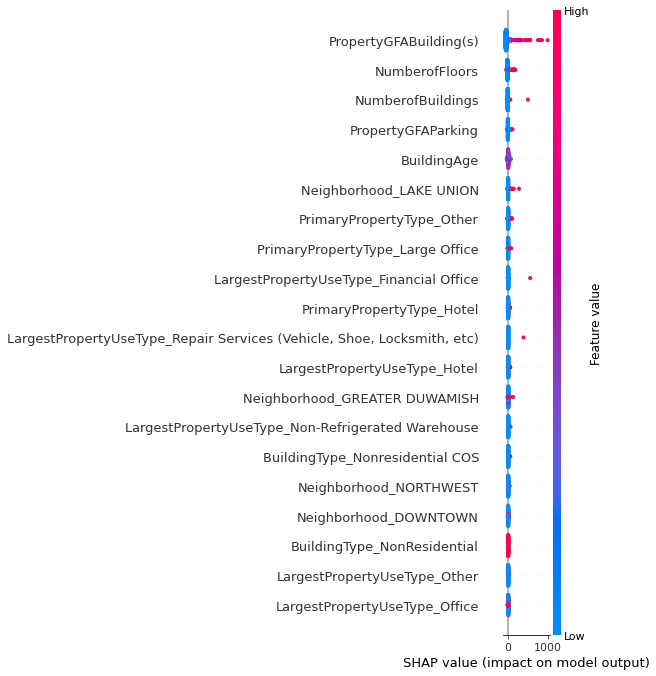

In [83]:
shap.summary_plot(shap_values, x_test)

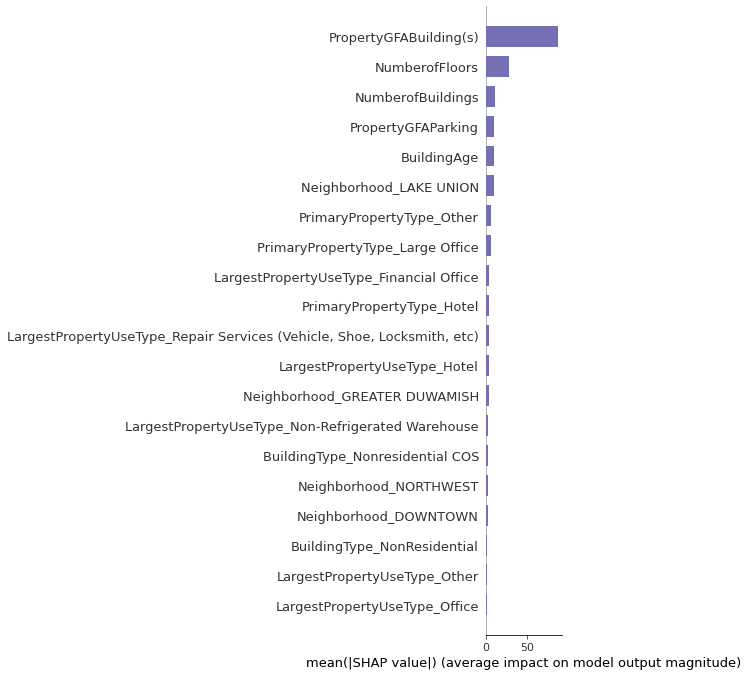

In [84]:
# SHAP feature importance
cmap = plt.get_cmap("Dark2")
shap.summary_plot(shap_values, x_test, plot_type="bar", color=cmap.colors[2])

In [85]:
# Display stacked Shapley values along clustered observations
shap.force_plot(explainer.expected_value, shap_values, x_test)

In [86]:
shap.force_plot(explainer.expected_value, shap_values, x_test)